# <span style="color:navy"> Exercise 2 </span>


## 2.1 - Importance sampling

The goal of this exercise is to use the Monte Carlo method to calculate this integral:
$$I = \int_0^1 \frac{\pi}{2}\cos(\frac{\pi x}{2}) dx = 1$$

We'll try two ways of sampling for comparison:

a. Uniform Sampling: $x$ random numbers come from a uniform distribution over $[0,1)$.

b. Importance Sampling: we pick random numbers from a probability density function $g(x)$. If $g(x)$  is well chosen, the variance of our results should be reduced.

The $g(x)$ should be:

- similar in shape to the integrand
- positive $(g(x)\geq 0)$
- normalized so that $\int_{0}^1 g(x) \, dx=1$

In this case, using the Taylor expansion didn’t work well since it’s not positive across the interval. Instead, we can take a straight line that matches the boundary values of the integrand and normalize it. The resulting pdf is $p(x)=2-2x$.

We apply the importance sampling, considering a new integrand:

$g(x)=\frac{\pi\cos(\frac{\pi x}{2})}{2(2-2x)}$


and we calculate $x$ from $g(x)$ using the cumulative inversion method:

$x=F^{-1}(y)= 1-\sqrt{1-y}$
where $y$ is from a uniform distribution over $[0,1)$.

In [14]:
import matplotlib
import matplotlib.pyplot as plt 
import numpy as np
import math
from scipy.optimize import curve_fit

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


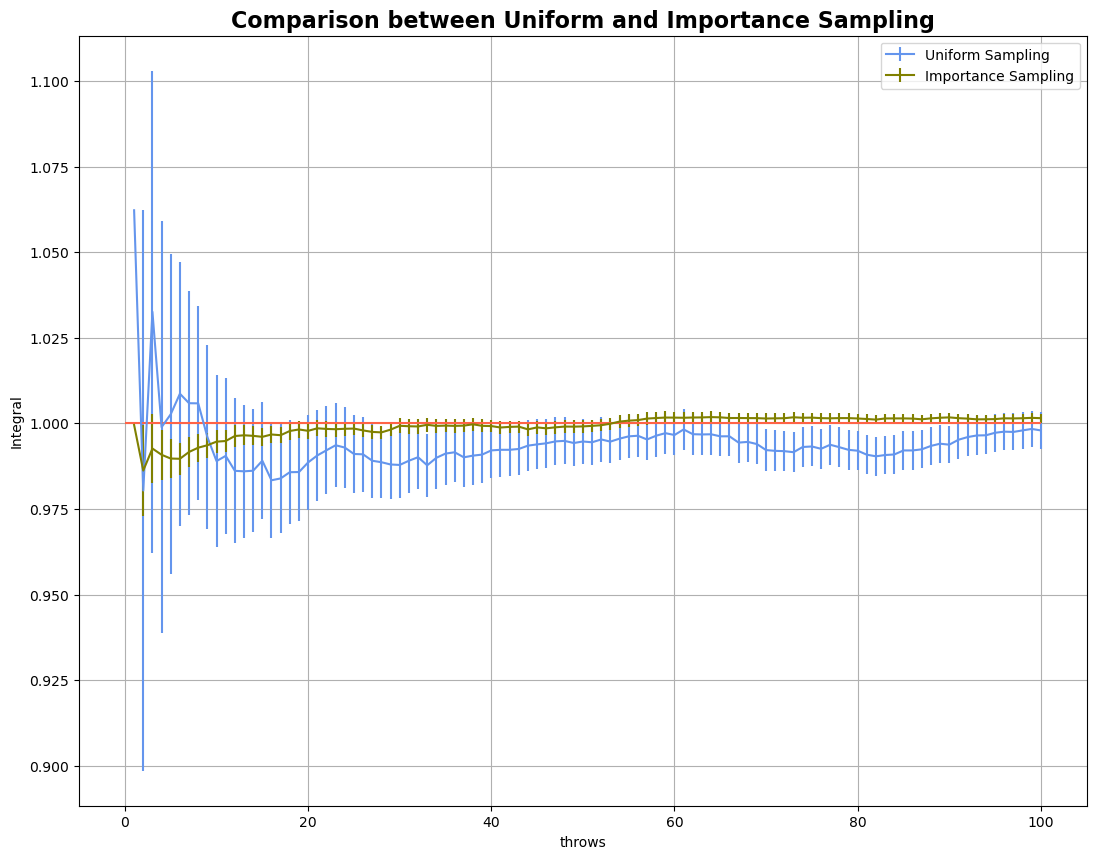

In [13]:
x1, y1, err1 = np.loadtxt("integralUnif.out", usecols=(0,1,2), unpack='true')
x2, y2, err2 = np.loadtxt("integralSamp.out", usecols=(0,1,2), unpack='true')

plt.figure(figsize=(13, 10))
plt.title('Comparison between Uniform and Importance Sampling', fontsize=16, fontweight='bold')
plt.errorbar(x1,y1,yerr=err1, color='Cornflowerblue', label="Uniform Sampling")
plt.errorbar(x2,y2,yerr=err2, color='olive', label="Importance Sampling")
plt.hlines(1, 0, 100, color='tomato')

plt.xlabel('throws')
plt.ylabel('Integral')

plt.grid(True)
plt.legend()
plt.show()

As we can see from the graph, the importance sampling makes the integral converging quickier to the actual solution, led by the ""micro"" uncertainties, i.e. square root of the variance.

## 2.2 - Random Walks


In this exercise, we look at the Random Walk (RW) in 3D, in both a lattice and a continuous space. The aim is to find the mean squared distance from the origin $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ and to see if it’s diffusive by checking if it follows the law $$r_{RMS}(s)=k\sqrt{s}$$

We do the RW up to $N=100$ steps, and repeat it $M=10^4$ times, split into $L=\frac{M}{N}$ blocks.

For each of the two types, the steps are chosen differently:

a. Discrete path: Each step is forward or backward by length $a=1$ in one of the main directions $x,y,z$. To do this, we use random numbers to pick a direction and a forward or backward step.

b. Continuous path: Here, each step is in a random direction. We switch to polar coordinates, picking a random solid angle to get the direction.

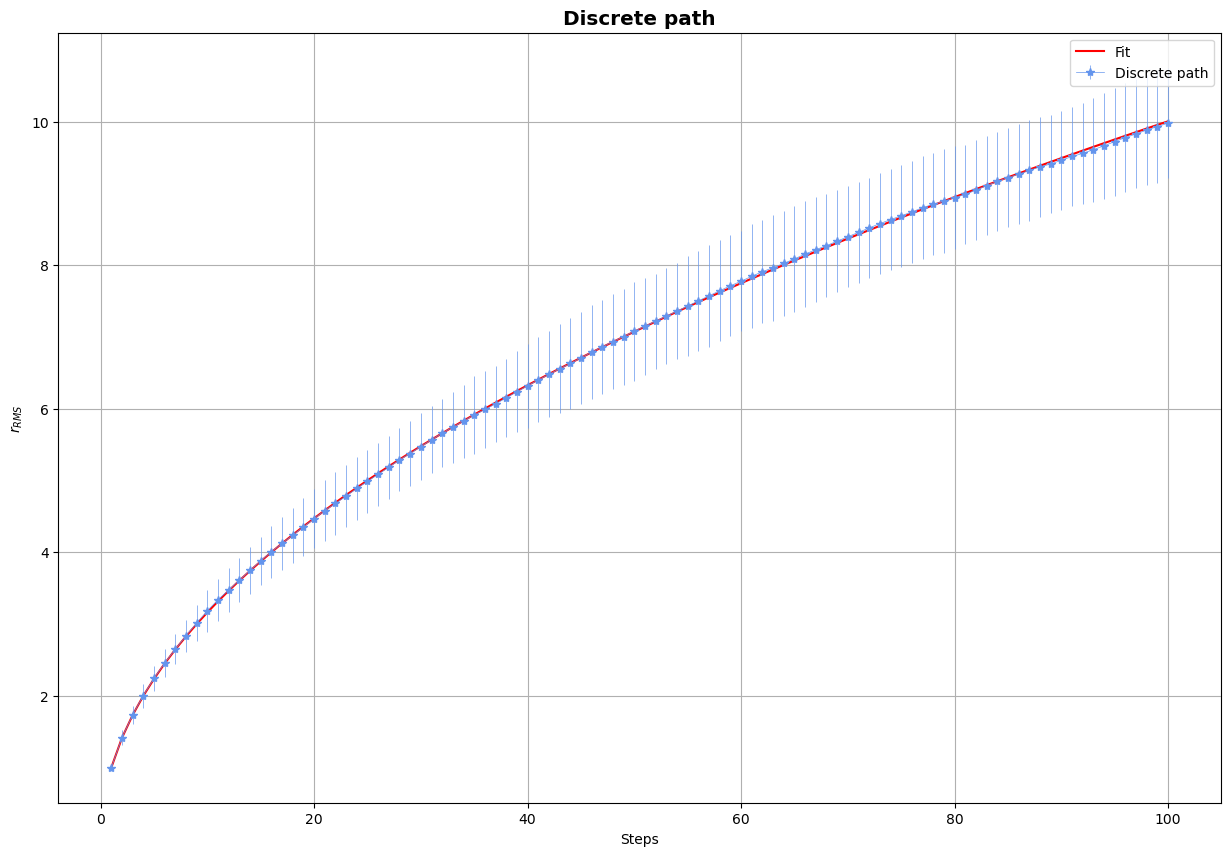

The fit function is: f(s)=k √s with k= 1.0003767499895557


In [25]:
def f (x, k):
    return k * np.sqrt(x)

x,y,err=np.loadtxt("RandomwalkD.out",usecols=(0,1,2),unpack=True)

fig=plt.figure(figsize=(15, 10))
plt.errorbar(x,y,yerr=err, label='Discrete path', linewidth=0.5, marker='*', color='Cornflowerblue',ecolor = 'Cornflowerblue')
plt.xlabel('Steps')
plt.ylabel('$r_{RMS}$')
plt.title("Discrete path", size='x-large', weight='bold')

#fitting
popt, pcov = curve_fit(f, x, y)
plt.plot(x,f(x,*popt), color='tomato', label='Fit')

plt.legend()
plt.grid(True)
plt.show()

print('The fit function is: f(s)=k √s with k=',popt[0])

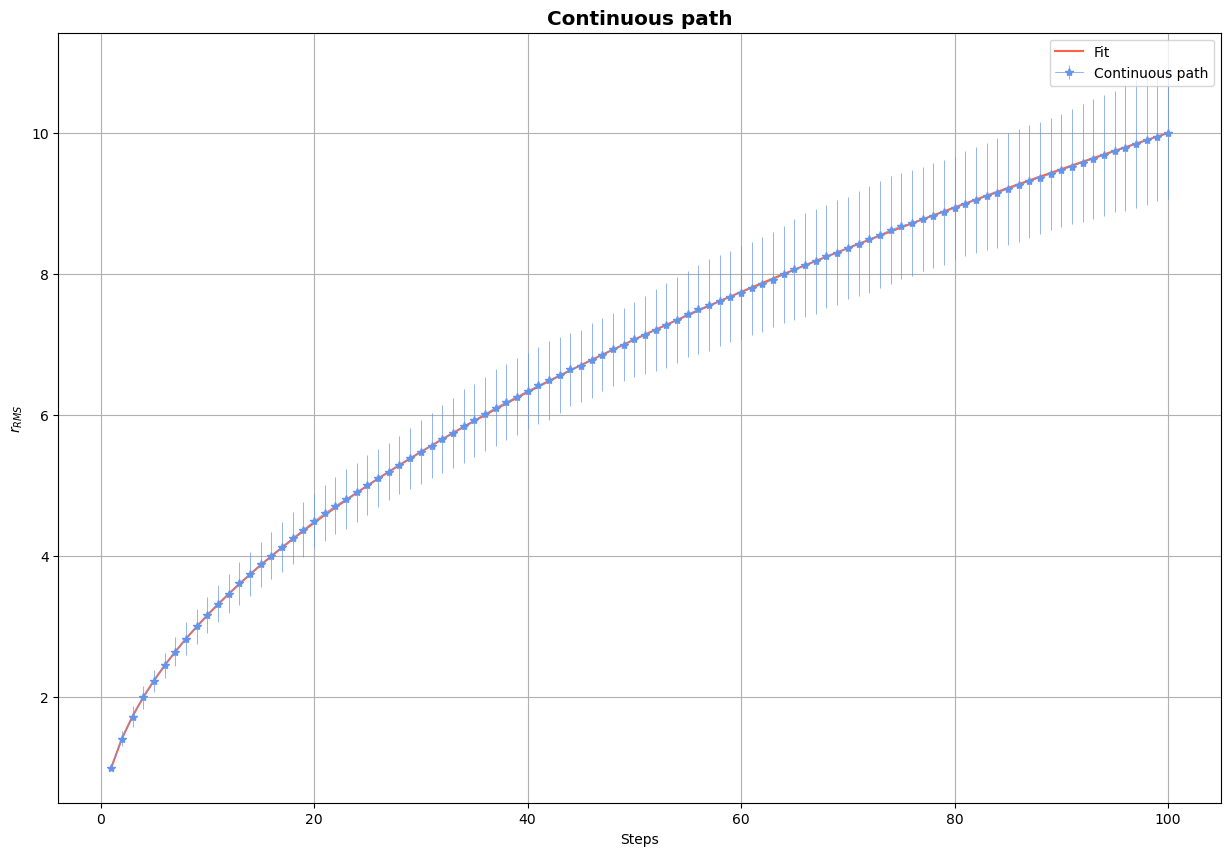

The fit function is: f(s)=k √s with k= 1.0002489430413228


In [27]:
x,y,err=np.loadtxt("RandomwalkC.out",usecols=(0,1,2),unpack=True)

fig=plt.figure(figsize=(15, 10))
plt.errorbar(x,y,yerr=err, label='Continuous path', linewidth=0.5, marker='*', color='Cornflowerblue',ecolor = 'Cornflowerblue')
plt.xlabel('Steps')
plt.ylabel('$r_{RMS}$')
plt.title("Continuous path", size='x-large', weight='bold')

#fitting
popt, pcov = curve_fit(f, x, y)
plt.plot(x,f(x,*popt), color='tomato', label='Fit')

plt.legend()
plt.grid(True)
plt.show()

print('The fit function is: f(s)=k √s with k=',popt[0])

As we can see in both graphs, there is a good compatibility between the sampling curve and its fitting $f(s)=k\sqrt{s}$.

This confirms that considering a large number of generated RW, this process can be considered diffusive.